# Part A


In [ ]:
# 1.Import the data. The headlines will become your vectorized X matrix, and the labels indicate a binary classification (clickbait or not).

#mounting google drive files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
# Define file path
file_path = '/content/drive/My Drive/MLLAB4/text_training_data.csv'

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

,headline,label
0,MyBook Disk Drive Handles Lots of Easy Backups,not clickbait
1,CIT Posts Eighth Loss in a Row,not clickbait
2,"Candy Carson Singing The ""National Anthem"" Is ...",clickbait
3,Why You Need To Stop What You're Doing And Dat...,clickbait
4,27 Times Adele Proved She's Actually The Reale...,clickbait


In [ ]:
# 2.Convert the headline data into an X feature matrix using a simple bag of words approach

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Extract the headlines as a list of strings
docs = data['headline'].tolist()

count = CountVectorizer()
bag = count.fit_transform(docs)

# Check the vocabulary and transformed bag of words
print(count.vocabulary_)
print(count.get_feature_names_out())
print(bag)


{'mybook': 12118, 'disk': 5391, 'drive': 5708, 'handles': 8231, 'lots': 10820, 'of': 12660, 'easy': 5880, 'backups': 1668, 'cit': 3619, 'posts': 13925, 'eighth': 5965, 'loss': 10815, 'in': 9123, 'row': 15606, 'candy': 3049, 'carson': 3163, 'singing': 16581, 'the': 18225, 'national': 12214, 'anthem': 1116, 'is': 9547, 'only': 12744, 'thing': 18258, 'you': 20213, 'need': 12264, 'today': 18441, 'why': 19870, 'to': 18431, 'stop': 17409, 'what': 19818, 're': 14696, 'doing': 5531, 'and': 1021, 'date': 4782, 'robot': 15482, '27': 197, 'times': 18391, 'adele': 603, 'proved': 14275, 'she': 16342, 'actually': 576, 'realest': 14721, 'celebrity': 3280, 'all': 876, '29': 203, 'blackgirlmagic': 2249, 'was': 19667, 'more': 11912, 'than': 18215, 'just': 9871, 'hashtag': 8326, '2015': 156, 'scientology': 15955, 'ties': 18358, 'at': 1433, 'new': 12334, 'village': 19447, 'leadership': 10415, 'academy': 481, 'stir': 17383, 'controversy': 4221, 'for': 7144, 'will': 19910, 'smith': 16784, 'jada': 9629, 'pin

In [ ]:
print(bag.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [ ]:
# Logistical Regression using Bag of Words
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import LabelEncoder

# Use the existing bag-of-words matrix (X) and labels (y)
X = bag  # Reuse the bag-of-words matrix created earlier
y = data['label']  # Assuming the label column contains string labels

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # 'clickbait' -> 1, 'not clickbait' -> 0

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Set up hyperparameter grid for C (inverse of regularization strength)
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(log_reg, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate on the test set
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1 Score on the test set: {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Best parameters: {'C': 10}
F1 Score on the test set: 0.9696391063586023

Classification Report:
               precision    recall  f1-score   support

    clickbait       0.97      0.96      0.97      2386
not clickbait       0.97      0.97      0.97      2610

     accuracy                           0.97      4996
    macro avg       0.97      0.97      0.97      4996
 weighted avg       0.97      0.97      0.97      4996



In [ ]:
# N-grams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

# Split the dataset
X = data['headline']  # Original text data
y = label_encoder.transform(data['label'])  # Numeric labels from previous steps

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline for logistic regression with n-grams
pipeline_ngram = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1, 2))),  # Use unigrams and bigrams
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Hyperparameter tuning
param_grid = {'classifier__C': [0.1, 1, 10, 100, 1000]}  # Regularization strength
grid_search_ngram = GridSearchCV(pipeline_ngram, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search_ngram.fit(X_train, y_train)

# Best model and evaluation
best_model_ngram = grid_search_ngram.best_estimator_
print(f"Best parameters for n-grams: {grid_search_ngram.best_params_}")

y_pred_ngram = best_model_ngram.predict(X_test)
f1_ngram = f1_score(y_test, y_pred_ngram)
print(f"F1 Score for n-grams: {f1_ngram}")
print("\nClassification Report for n-grams:")
print(classification_report(y_test, y_pred_ngram))


Best parameters for n-grams: {'classifier__C': 100}
F1 Score for n-grams: 0.9688871922122543

Classification Report for n-grams:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2386
           1       0.97      0.97      0.97      2610

    accuracy                           0.97      4996
   macro avg       0.97      0.97      0.97      4996
weighted avg       0.97      0.97      0.97      4996



In [ ]:
# Stop-words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

# Split the dataset
X = data['headline']  # Original text data
y = label_encoder.transform(data['label'])  # Numeric labels from previous steps

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline for logistic regression with stop-words removal
pipeline_stopwords = Pipeline([
    ('vectorizer', CountVectorizer(stop_words='english')),  # Removes common stop words
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Hyperparameter tuning
param_grid = {'classifier__C': [0.1, 1, 10, 100, 1000]}  # Regularization strength
grid_search_stopwords = GridSearchCV(pipeline_stopwords, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search_stopwords.fit(X_train, y_train)

# Best model and evaluation
best_model_stopwords = grid_search_stopwords.best_estimator_
print(f"Best parameters for stop-words: {grid_search_stopwords.best_params_}")

y_pred_stopwords = best_model_stopwords.predict(X_test)
f1_stopwords = f1_score(y_test, y_pred_stopwords)
print(f"F1 Score for stop-words method: {f1_stopwords}")
print("\nClassification Report for stop-words:")
print(classification_report(y_test, y_pred_stopwords))


Best parameters for stop-words: {'classifier__C': 1}
F1 Score for stop-words method: 0.9512937595129376

Classification Report for stop-words:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2386
           1       0.94      0.96      0.95      2610

    accuracy                           0.95      4996
   macro avg       0.95      0.95      0.95      4996
weighted avg       0.95      0.95      0.95      4996



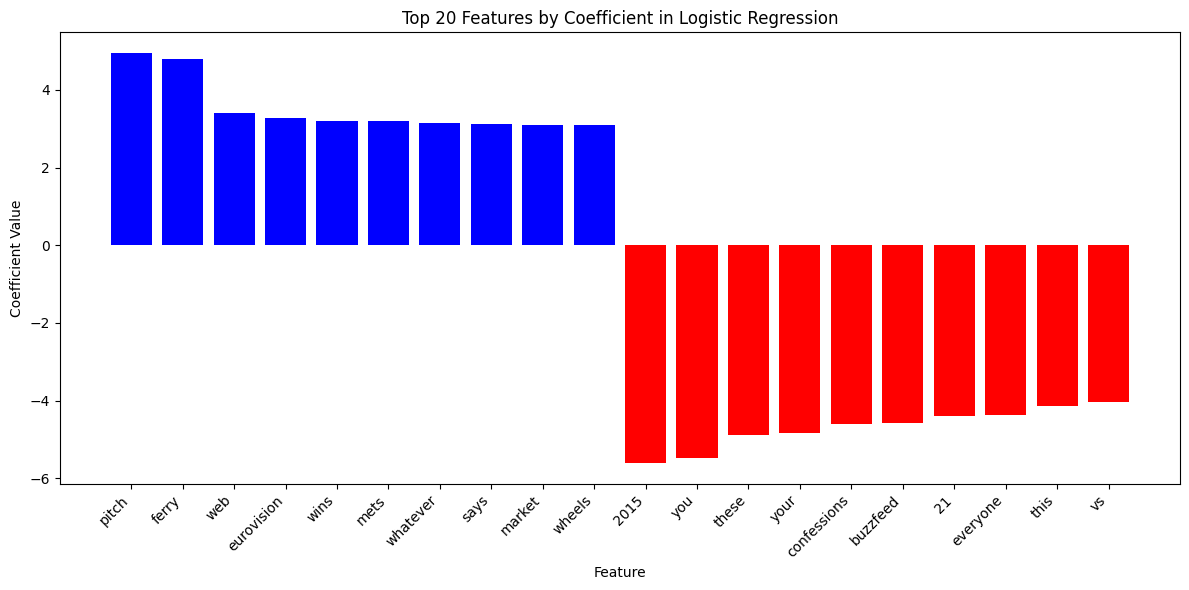

In [ ]:
#bag of words coefficients
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature names from the CountVectorizer
feature_names = count.get_feature_names_out()  # Use the 'count' object from earlier

# Get the coefficients from the best model
coefficients = best_model.coef_[0]  # Coefficients for the logistic regression model

# Create a DataFrame to map coefficients to feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Split into positive and negative coefficients
positive_features = coef_df[coef_df['Coefficient'] > 0].sort_values(by='Coefficient', ascending=False).head(10)
negative_features = coef_df[coef_df['Coefficient'] < 0].sort_values(by='Coefficient').head(10)

# Combine the top positive and negative coefficients
top_features = pd.concat([positive_features, negative_features])

# Plot the top features
plt.figure(figsize=(12, 6))

# Assign colors: red for negative coefficients, blue for positive
colors = ['blue' if coef > 0 else 'red' for coef in top_features['Coefficient']]

# Plot vertical bars
plt.bar(top_features['Feature'], top_features['Coefficient'], color=colors)

# Add labels and title
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.title('Top 20 Features by Coefficient in Logistic Regression')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


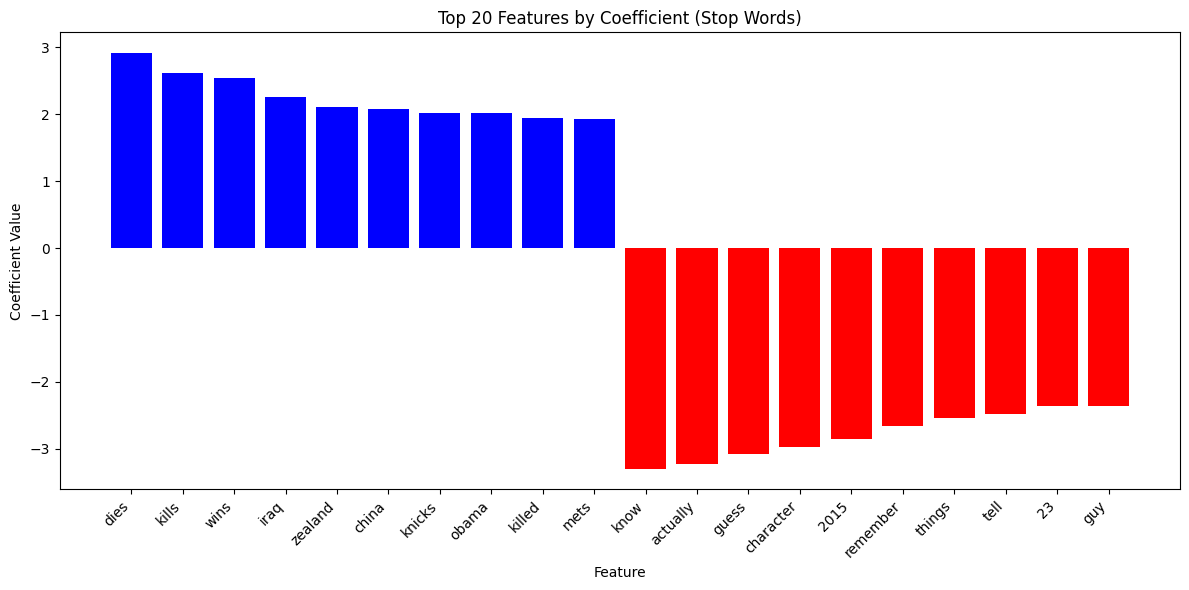

In [ ]:
#stop-words coefficients
# Stop words vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Vectorization with stop words
stop_words_vectorizer = CountVectorizer(stop_words='english')  # Remove common stop words
bag_stop_words = stop_words_vectorizer.fit_transform(docs)

# Train logistic regression model
log_reg_stop_words = LogisticRegression(max_iter=1000, random_state=42)
log_reg_stop_words.fit(bag_stop_words, y_encoded)

# Get feature names and coefficients
feature_names_stop_words = stop_words_vectorizer.get_feature_names_out()
coefficients_stop_words = log_reg_stop_words.coef_[0]

# Create DataFrame for coefficients
coef_df_stop_words = pd.DataFrame({
    'Feature': feature_names_stop_words,
    'Coefficient': coefficients_stop_words
})

# Sort and select top 20 features
positive_features_stop = coef_df_stop_words[coef_df_stop_words['Coefficient'] > 0]\
    .sort_values(by='Coefficient', ascending=False).head(10)
negative_features_stop = coef_df_stop_words[coef_df_stop_words['Coefficient'] < 0]\
    .sort_values(by='Coefficient').head(10)

top_features_stop_words = pd.concat([positive_features_stop, negative_features_stop])

# Plot top 20 coefficients
plt.figure(figsize=(12, 6))
colors = ['blue' if coef > 0 else 'red' for coef in top_features_stop_words['Coefficient']]
plt.bar(top_features_stop_words['Feature'], top_features_stop_words['Coefficient'], color=colors)
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.title('Top 20 Features by Coefficient (Stop Words)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


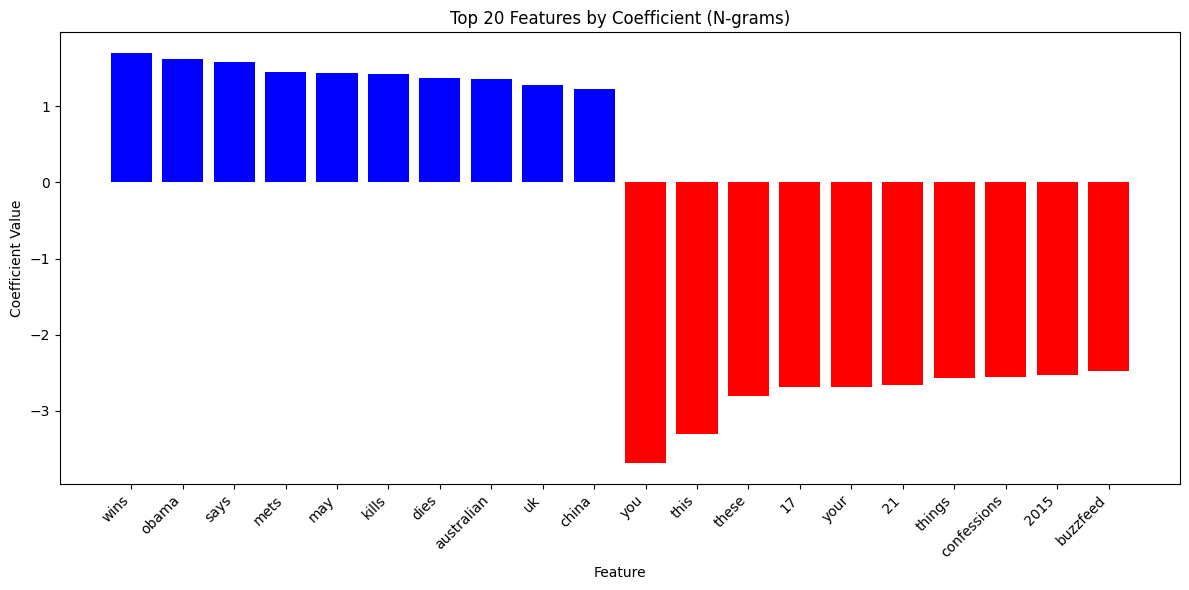

In [ ]:
#n-grams coefficients
# N-grams vectorization
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams
bag_ngrams = ngram_vectorizer.fit_transform(docs)

# Train logistic regression model
log_reg_ngrams = LogisticRegression(max_iter=1000, random_state=42)
log_reg_ngrams.fit(bag_ngrams, y_encoded)

# Get feature names and coefficients
feature_names_ngrams = ngram_vectorizer.get_feature_names_out()
coefficients_ngrams = log_reg_ngrams.coef_[0]

# Create DataFrame for coefficients
coef_df_ngrams = pd.DataFrame({
    'Feature': feature_names_ngrams,
    'Coefficient': coefficients_ngrams
})

# Sort and select top 20 features
positive_features_ngrams = coef_df_ngrams[coef_df_ngrams['Coefficient'] > 0]\
    .sort_values(by='Coefficient', ascending=False).head(10)
negative_features_ngrams = coef_df_ngrams[coef_df_ngrams['Coefficient'] < 0]\
    .sort_values(by='Coefficient').head(10)

top_features_ngrams = pd.concat([positive_features_ngrams, negative_features_ngrams])

# Plot top 20 coefficients
plt.figure(figsize=(12, 6))
colors = ['blue' if coef > 0 else 'red' for coef in top_features_ngrams['Coefficient']]
plt.bar(top_features_ngrams['Feature'], top_features_ngrams['Coefficient'], color=colors)
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.title('Top 20 Features by Coefficient (N-grams)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Of the three models, the bag of words model appears to perform the best in terms of f-1 score, while the stop-words model performs the worst. Precision and recall for the bag of words model and the n-grams model are identical, but the f-1 score for the n-grams model is slightly worse. In terms of coefficients, it seems like all three models generally attribute the same coefficeints to each feature, with the only exception being the stop-words model, which doesn't attribute much importance to the 'you' feature.  

# Part B


In [ ]:
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv'
data = pd.read_csv(url)
data.head()

,rownames,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
import pandas as pd

# Example: Load your dataset (replace with actual file path or source)
data = pd.read_csv(url)

# Number of features (assuming the target column is the last one)
n_features = data.shape[1] - 1
print(f"Number of features: {n_features}")


Number of features: 5


In [ ]:
# Load libraries
import numpy as np
!pip install tensorflow
import pandas as pd
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD


# The core data structure of Keras is a model, a way to organize layers
# Here we are using a Sequential model architecture
model = Sequential()

In [ ]:

#NN 2 layers 16 neurons
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Assume 'data' is your pandas DataFrame with features and target
# Split features (X) and target (y)
X = data.drop(columns=['Species']).values  # Features
y = data['Species'].values  # Target

# Convert string labels in y to one-hot encoding directly
unique_classes = list(set(y))  # Extract unique class labels
num_classes = len(unique_classes)  # Number of unique classes
class_to_index = {cls: i for i, cls in enumerate(unique_classes)}  # Map classes to integers
y = [class_to_index[label] for label in y]  # Convert labels to integers

# One-hot encode the y data using to_categorical()
y = to_categorical(y, num_classes=num_classes)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X.shape[1]))  # First hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Optimize using SGD with a learning rate
sgd = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

# Evaluate the model
score = model.evaluate(x_test, y_test, batch_size=128)  # Extract loss and accuracy
print(f"Loss: {score[0]}, Accuracy: {score[1]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3250 - loss: 6.8055
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3333 - loss: 5.2705
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.3250 - loss: 12.2882
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.3417 - loss: 7.6394
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.3250 - loss: 6.2564
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.3333 - loss: 1.4733
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.3500 - loss: 1.6632
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - accuracy: 0.3333 - loss: 1.9135
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.3417 - loss: 1.0598
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - accuracy: 0.3583 - loss: 1.1099
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.3500 - loss: 1.2615
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.3667 - loss

In [ ]:
#NN 4 layers 32 neurons
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Assume 'data' is your pandas DataFrame with features and target
# Split features (X) and target (y)
X = data.drop(columns=['Species']).values  # Features
y = data['Species'].values  # Target

# Convert string labels in y to one-hot encoding directly
unique_classes = list(set(y))  # Extract unique class labels
num_classes = len(unique_classes)  # Number of unique classes
class_to_index = {cls: i for i, cls in enumerate(unique_classes)}  # Map classes to integers
y = [class_to_index[label] for label in y]  # Convert labels to integers

# One-hot encode the y data using to_categorical()
y = to_categorical(y, num_classes=num_classes)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X.shape[1]))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(32, activation='relu'))  # Fourth hidden layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Optimize using SGD with a learning rate
sgd = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

# Evaluate the model
score = model.evaluate(x_test, y_test, batch_size=128)  # Extract loss and accuracy
print(f"Loss: {score[0]}, Accuracy: {score[1]}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.3417 - loss: 5.4965
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3417 - loss: 1.8527
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3417 - loss: 1.2210
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3250 - loss: 1.1889
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4750 - loss: 0.9970
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3417 - loss: 1.0022
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3500 - loss: 1.0031
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3583 - loss: 1.0149
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3417 - loss: 0.9949
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3750 - loss: 1.0073
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3750 - loss: 0.9776
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.3750 - loss: 0.9838
Epoch 13/20

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.6667 - loss: 0.8665
Loss: 0.866498589515686, Accuracy: 0.6666666865348816


In [ ]:
#NN 8 layers 64 neurons
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Assume 'data' is your pandas DataFrame with features and target
# Split features (X) and target (y)
X = data.drop(columns=['Species']).values  # Features
y = data['Species'].values  # Target

# Convert string labels in y to one-hot encoding directly
unique_classes = list(set(y))  # Extract unique class labels
num_classes = len(unique_classes)  # Number of unique classes
class_to_index = {cls: i for i, cls in enumerate(unique_classes)}  # Map classes to integers
y = [class_to_index[label] for label in y]  # Convert labels to integers

# One-hot encode the y data using to_categorical()
y = to_categorical(y, num_classes=num_classes)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(64, activation='relu'))  # Third hidden layer
model.add(Dense(64, activation='relu'))  # Fourth hidden layer
model.add(Dense(64, activation='relu'))  # Fifth hidden layer
model.add(Dense(64, activation='relu'))  # Sixth hidden layer
model.add(Dense(64, activation='relu'))  # Seventh hidden layer
model.add(Dense(64, activation='relu'))  # Eighth hidden layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer

# Optimize using SGD with a learning rate
sgd = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          epochs=20,
          batch_size=128)

# Evaluate the model
score = model.evaluate(x_test, y_test, batch_size=128)  # Extract loss and accuracy
print(f"Loss: {score[0]}, Accuracy: {score[1]}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3250 - loss: 1.2194    
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3250 - loss: 0.9934
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3250 - loss: 0.9716
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3250 - loss: 0.9664
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3250 - loss: 0.9630
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3250 - loss: 0.9620
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.3250 - loss: 0.9567
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3417 - loss: 0.9539
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.3750 - loss: 0.9512
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3917 - loss: 0.9476
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4000 - loss: 0.9446
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4000 - loss: 0.9428
Epoch 13/

Overall, it appears that adding neurons and layers does in fact improve the accuracy of the model, with the second and third models observing higher accuracy scores than the first model (less layers and neurons). However, one thing I did notice is that the accuracy scores can fluctuate between the second and third models, which indicates that for small datasets there may be a local minima/maxima where adding a certain number of layers or neurons becomes futile in improving accuracy.